In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import signal
import math
from os import path

In [2]:
plt.rc('text', usetex=True)

inpath = "../../"

currentfile = "Imitator_2_2400.csv"

# Read from file
strdatatype = np.dtype([('N', np.int_, (2,)), ('Time_Count', np.int_ ), ('Mode', np.int_ ),
                            ('T', np.float_, (10,)), ('S', np.bool_, (10,)), ('System_State', np.bool_ )])
N, Time_Count, Mode, T, S, System_State = np.loadtxt(path.join(inpath, currentfile),
        unpack=True, delimiter=';', skiprows=1, dtype=strdatatype)

[   0    1    2 ... 2398 2399 2400]
[46.46008296 51.17311    51.98049593 ... 31.6890129  39.37156188
 43.50980433]


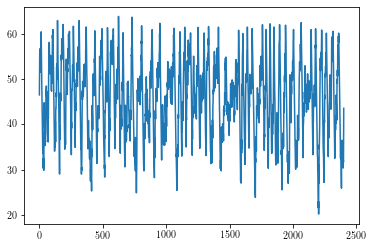

In [4]:
print(N[:, 1])
print(T[:, 9])
plt.plot(N[:, 1], T[:, 9])
plt.show()

In [40]:
# t = np.linspace(-1, 1, 601, endpoint=True)
# sig  = np.cos(2 * np.pi * 7 * t) + signal.gausspulse(t - 0.4, fc=3)
# sig  = np.cos(2 * np.pi * 7 * t)
# sig  = signal.gausspulse(t - 0.4, fc=2)
# plt.plot(t, sig)
# plt.show()
w_start = 1
w_stop = 200
w_step = .2
widths = np.arange(w_start, w_stop, w_step)
for index in range(0, 10):
    arMean = np.ones(len(T[:, index])) * np.mean(T[:, index])
    sig = T[:, index] - arMean
    print(arMean[5])
    cwtmatr = signal.cwt(T[:, index], signal.ricker, widths)
#     print(cwtmatr)
    cwtmatr = cwtmatr[:, 500:1900]
    
    fig, ax = plt.subplots(figsize=(10, 5), dpi=240)
    plt.imshow(cwtmatr, extent=[500, 1900, w_stop * 4, w_start * 4], cmap='PRGn', aspect='auto',
                   vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
    # plt.imshow(cwtmatr, cmap='PRGn', aspect='auto',
    #                vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
    plt.colorbar()
#     plt.(figsize=(20, 10), dpi=120)
#     plt.tight_layout()
    plt.xlabel(r'Timeshift')
    plt.ylabel(r'Generalized period')
#     plt.draw()
#     plt.show()
    plt.savefig('plots/' + repr(index) + '_WVT.png')
    plt.clf()

46.32162337702863
45.996273382081604
45.87217866219023
46.47000393227543
46.538704085059514
46.37245807341693
46.34850902886283
46.24557538011151
46.00398587124245
45.80112237033387


<Figure size 2400x1200 with 0 Axes>

<Figure size 2400x1200 with 0 Axes>

<Figure size 2400x1200 with 0 Axes>

<Figure size 2400x1200 with 0 Axes>

<Figure size 2400x1200 with 0 Axes>

<Figure size 2400x1200 with 0 Axes>

<Figure size 2400x1200 with 0 Axes>

<Figure size 2400x1200 with 0 Axes>

<Figure size 2400x1200 with 0 Axes>

<Figure size 2400x1200 with 0 Axes>